# Importing Libraries & Data

In [124]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# for pre-processing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# For Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# To split the data
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# To evaluate the models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [164]:
# Reading the csv file
df = pd.read_csv('data\student-dataset.csv', delimiter=';')

# Creating a copy of the DataFrame
data = df.copy()

###
# .copy() will create a true copy
# data = df will just make data refer to df
###

# 1. Understanding the Data

In [88]:
# Checking the top 5 rows
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [89]:
# Checking the minmum and maximum age so we can understand the spread
print('min age of student:', min(data['age']))
print('max age of student:',max(data['age']))

min age of student: 15
max age of student: 22


In [90]:
# Checking the shape i.e number of rows & columns
data.shape

(395, 33)

In [91]:
data['absences'].unique()

array([ 6,  4, 10,  2,  0, 16, 14,  7,  8, 25, 12, 54, 18, 26, 20, 56, 24,
       28,  5, 13, 15, 22,  3, 21,  1, 75, 30, 19,  9, 11, 38, 40, 23, 17])

In [92]:
# Checking the average scores
print('mean of G1:', data['G1'].mean())
print('mean of G2:', data['G2'].mean())

### NOTE: G3 is the final year grade (issued at the 3rd period),
###       while G1 and G2 correspond to the 1st and 2nd period grades.
###       G3 is strongly correlated with G1 and G2
print('mean of G3:', data['G3'].mean())

mean of G1: 10.90886075949367
mean of G2: 10.713924050632912
mean of G3: 10.415189873417722


In [93]:
table = data.groupby('traveltime')['G3'].mean()
table

,G3
traveltime,
1,10.782101
2,9.906542
3,9.260870
4,8.750000


# 2. Data Cleaning

In [94]:
data.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [95]:
# Checking for duplicate data
data.duplicated().sum()

0

In [96]:
# CHecking the number of unique values in each column
data.nunique()

,0
school,2
sex,2
age,8
address,2
famsize,2
Pstatus,2
Medu,5
Fedu,5
Mjob,5
Fjob,5


In [97]:
# Information about the data types and the no. of entries in the columns
data['school'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 395 entries, 0 to 394
Series name: school
Non-Null Count  Dtype 
--------------  ----- 
395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# 4. Feature Engineering


## 4.1 Final Grades
  COnverting marks into percentage and assigning grades -
  * 16-20 : Excellent
  * 14-15 : Good
  * 12-13 : Satisfactory
  * 10-11  : Poor
  * 0-9   : Fail

In [165]:
data.loc[data['G3'] >= 16, 'final_grade'] = 'Excellent' # above 18
data.loc[data['G3'].between(13,16), 'final_grade'] = 'Good' # 15-17
data.loc[data['G3'].between(11,14), 'final_grade'] = 'Satisfactory' # 11-14
data.loc[data['G3'].between(9,12), 'final_grade'] = 'Poor' # 6-10
data.loc[data['G3'] <= 9, 'final_grade'] = 'Fail' # below 6

# 5. EDA - Exploratory Data Analysis

In [99]:
# Setting a color palette for Visuals
color_palette = sns.color_palette('muted')

## 5.1 Univariate Data Analyis

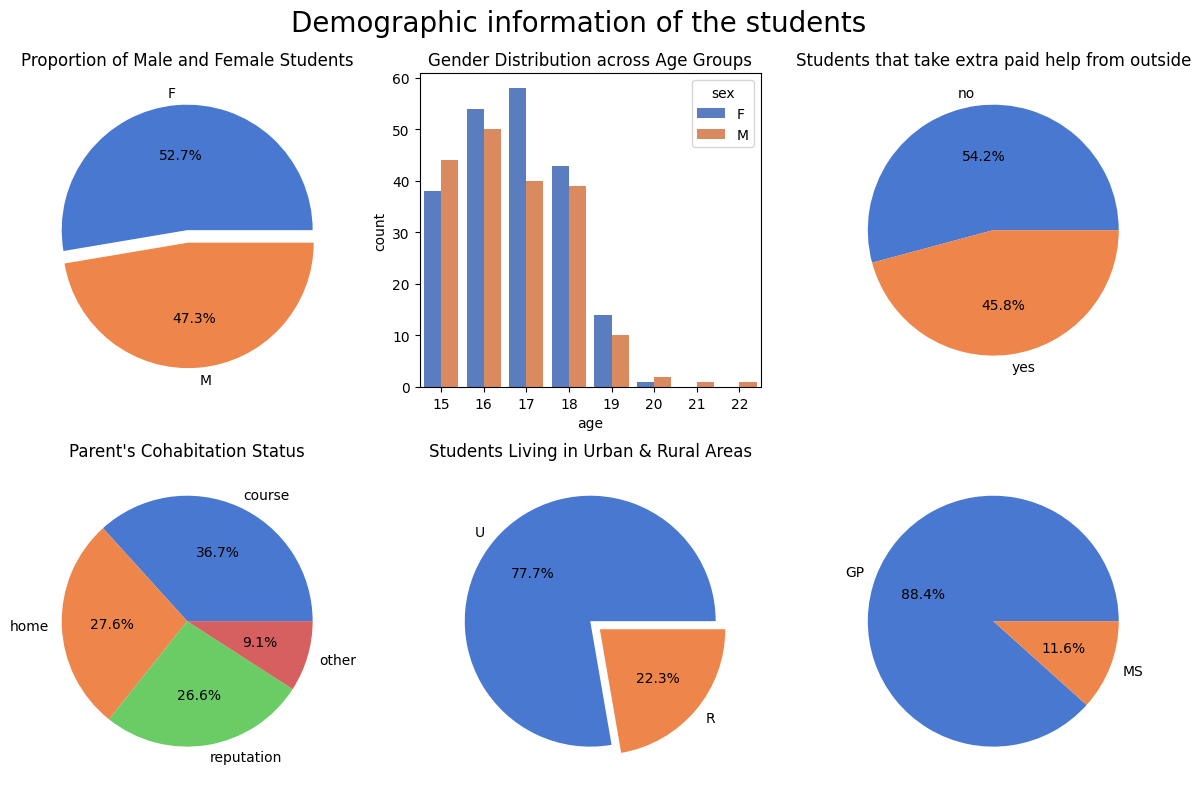

In [167]:
# Creating basic plots about the Demographic information of students

f, axs = plt.subplots(2,3, figsize=(12,8))

ax = axs[0,0]
ax.pie(x=data['sex'].value_counts(), labels = data['sex'].value_counts().index,
       colors = color_palette, autopct='%1.1f%%', explode=(0,0.1))
ax.set_title('Proportion of Male and Female Students')

ax = axs[0,1]
sns.countplot(x=data['age'], hue=data['sex'],
              palette = color_palette, linewidth=2, ax=ax)
ax.set_title('Gender Distribution across Age Groups')

ax = axs[0,2]
ax.pie(x=data['paid'].value_counts(),
       labels = data['paid'].value_counts().index,
       colors = color_palette,
       autopct='%1.1f%%')
ax.set_title('Students that take extra paid help from outside')

ax = axs[1,0]
ax.pie(x=data['reason'].value_counts(),
       labels = data['reason'].value_counts().index,
       colors = color_palette,
       autopct='%1.1f%%')
ax.set_title('Parent\'s Cohabitation Status')

ax = axs[1,1]
ax.pie(x=data['address'].value_counts(),
       labels=data['address'].value_counts().index,
       colors = color_palette, autopct= '%1.1f%%',
       explode = (0,0.1))
ax.set_title('Students Living in Urban & Rural Areas')

ax = axs[1,2]
ax.pie(x=data['school'].value_counts(),
       labels=data['school'].value_counts().index,
       colors = color_palette, autopct= '%1.1f%%')


plt.suptitle('Demographic information of the students', fontsize=20)


#plt.delaxes(ax=axs[1,2])
plt.tight_layout()
plt.show()

### Insights:


*   No. of female students and male students is almost equal, no. of female students is slightly higher.
*   Most no. of students are between the ages 15-18

*   Most of the students are from Gabriel Pereira School.

*   Almost 50% of the students take extra paid classes outside of school.
*   The reason majority of the students joined is due to the course.
  * Distance from home and school reputation.


*   78% of the students come from Urban areas and 22% from Rural areas.







## 5.2 Bivariate Data Analysis

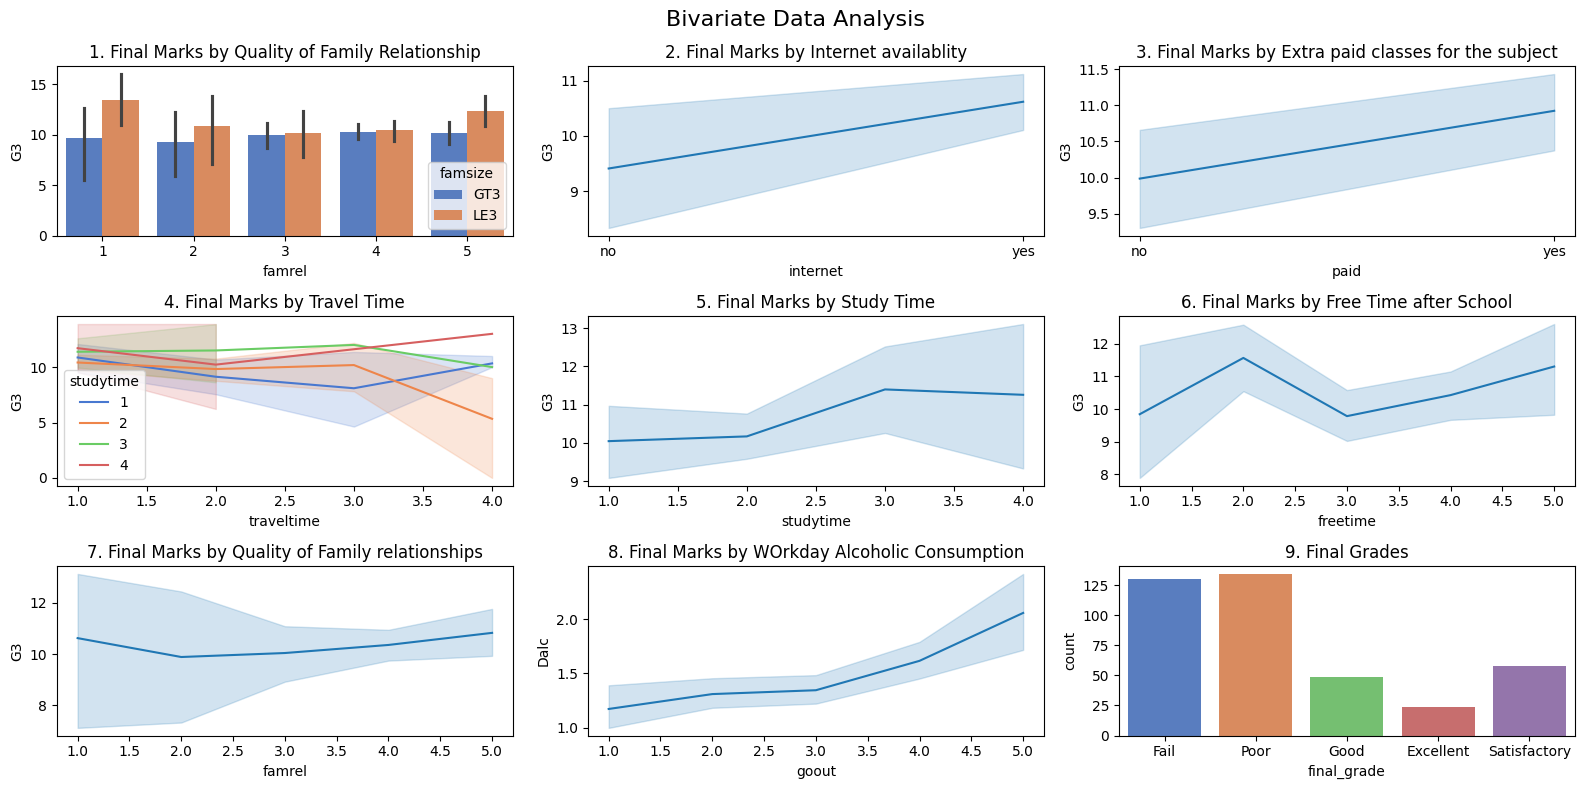

In [185]:
# Creating more graphs that are related to the student's academics

f, axs = plt.subplots(3,3, figsize=(16,8))


ax = axs[0,0]
sns.barplot(x=data['famrel'], y=data['G3'], hue=data['famsize'],
            palette = color_palette, linewidth=2, ax=ax)
ax.set_title('1. Final Marks by Quality of Family Relationship')

ax = axs[0,1]
sns.lineplot(x=data['internet'], y=data['G3'], palette=color_palette, ax=ax)
ax.set_title('2. Final Marks by Internet availablity')

ax=axs[0,2]
sns.lineplot(x=data['paid'], y=data['G3'], palette=color_palette, ax=ax)
ax.set_title('3. Final Marks by Extra paid classes for the subject')

ax = axs[1,0]
sns.lineplot(x=data['traveltime'],y = data['G3'], hue=data['studytime'],
             palette = color_palette, ax=ax)
ax.set_title('4. Final Marks by Travel Time')

ax = axs[1,1]
sns.lineplot(x=data['studytime'], y=data['G3'], palette=color_palette, ax=ax)
ax.set_title('5. Final Marks by Study Time')

ax = axs[1,2]
sns.lineplot(x=data['freetime'], y=data['G3'], palette=color_palette, ax=ax)
ax.set_title('6. Final Marks by Free Time after School')

ax = axs[2,0]
sns.lineplot(x=data['famrel'], y=data['G3'], palette=color_palette, ax=ax)
ax.set_title('7. Final Marks by Quality of Family relationships')

ax = axs[2,1]
sns.lineplot(x=data['goout'], y=data['Dalc'],
             palette=color_palette, ax=ax)
ax.set_title('8. Final Marks by WOrkday Alcoholic Consumption')

ax = axs[2,2]
sns.countplot(x=data['final_grade'], palette=color_palette, ax=ax)
ax.set_title('9. Final Grades')


plt.suptitle('Bivariate Data Analysis', fontsize=16)
plt.tight_layout()
plt.show()

Insights:


*   Family of 3 or less show better family relationship.

*   Students with Internet availability show higher marks


*   Students taking extra paid classes show higher marks.

*   Students who study for 5-10 hours a week show higher average marks.

*   Optimal free time after school is 2.
    * 1 - very low; 5 - very high

* Consumption of alcohol during the week increases the more they go out with friends.

*   Most students scored poorly.




# 6. Data Preparation

## 6.1 Pre-processing


In [187]:
# Creating a backup
data_backup = data.copy()

In [188]:
# Getting Categorical Features
categorical_features = data.select_dtypes(include=['object']).columns

# Getting Nominal Features
categorical_features_nominal = ['Mjob', 'Fjob', 'reason', 'guardian']

# Ordinal Features - Removing the nominal features from the categorical features
categorical_features_ordinal = categorical_features.drop(categorical_features_nominal)


In [189]:
# Getting Numerical Features
numerical_features = data.select_dtypes(exclude=['object']).columns

Label encoder - For Ordinal Data (There is order of significance)\
One Hot Encoder - For Nominal Data (No order of significance)

In [190]:
# Scaling Categorical Ordinal Features

label = LabelEncoder()

# Going through and converting one column at a time
for col in categorical_features_ordinal:
  data[col] = label.fit_transform(data[col])

In [191]:
# Scaling Categorical Nominal Features
one_hot = OneHotEncoder(sparse=False, drop='first')

# Convert the columns
one_hot_encoded = one_hot.fit_transform(data[categorical_features_nominal])

# convert the above into a DataFrame
encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot.get_feature_names_out(categorical_features_nominal))

# Now add the new df in place of the old ones in the Data
data = pd.concat([data.drop(columns=categorical_features_nominal), encoded_df], axis=1)

In [192]:
# Scaling Numerical Features

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [194]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,1.023046,1,0,0,1.143856,1.360371,0.792251,-0.042286,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0.238380,1,0,1,-1.600009,-1.399970,-0.643249,-0.042286,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,-1.330954,1,1,1,-1.600009,-1.399970,-0.643249,-0.042286,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0,0,-1.330954,1,0,1,1.143856,-0.479857,-0.643249,1.150779,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,0,-0.546287,1,0,1,0.229234,0.440257,-0.643249,-0.042286,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 6.2 Feature Selection

In [115]:
# Independent Variables - Feature table that will be used to predict Y
X = data.drop(columns='G3')
X = data.drop(columns='final_grade')

In [110]:
# Dependent Variable
Y = data['G3']

In [116]:
# Selecting the best Features using SelectKbest and f_regression
feature_selector = SelectKBest(score_func=f_regression, k='all')
X_new = feature_selector.fit_transform(X,Y)

In [119]:
# Saving the new features to variable X
X = X_new

## 6.3 Train Test Split

In [122]:
# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=44)

# 7. Modelling

## 7.1 Initialising the models

In [ ]:
# Initialising the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Neural Network': MLPRegressor()
}

## 7.2 Training

In [125]:
# Training the models
for name, model in models.items():
  model.fit(X_train, Y_train)

# 8 Model Evaluation

In [161]:
# Evaluating the models
results = {}

for name, model in models.items():
  Y_pred = model.predict(X_test)

  mse = mean_squared_error(Y_test, Y_pred)
  mae = mean_absolute_error(Y_test, Y_pred)
  r2 = r2_score(Y_test, Y_pred)

  results[name] = {'MSE': mse, 'MAE': mae, 'r2': r2}

# Printing the results
results_df = pd.DataFrame.from_dict(results).T # .T to transpose it
print(results_df)

                                 MSE           MAE        r2
Linear Regression       8.921151e-31  7.574813e-16  1.000000
Random Forest           6.532720e-04  4.232652e-03  0.999387
Support Vector Machine  6.284631e-02  1.898110e-01  0.941009
Neural Network          4.655457e-02  1.705322e-01  0.956301


## 8.1 Visualization

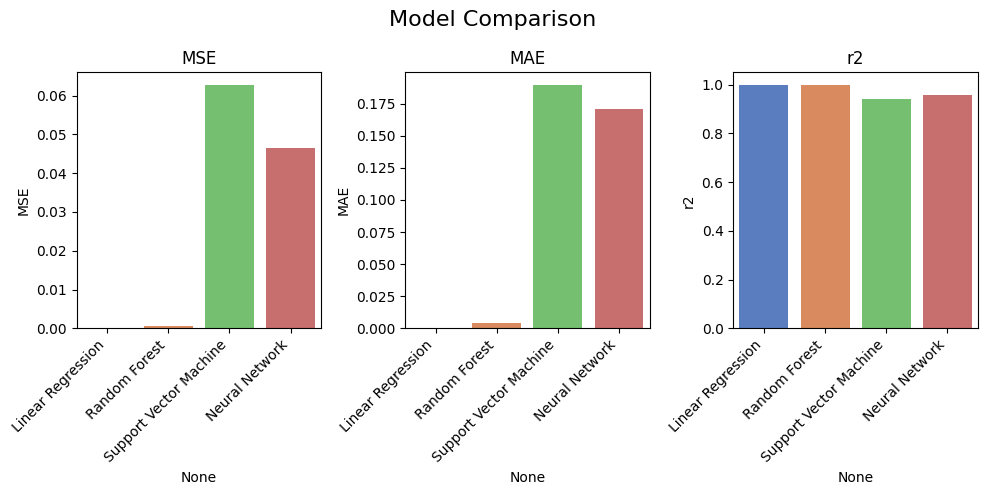

In [160]:
f, axs = plt.subplots(1,3,figsize=(10,5))

for i in range(0,3):
  ax=axs[i]
  metric = results_df.columns[i]
  sns.barplot(x=results_df.index, y = results_df[metric], palette=color_palette, ax=ax)
  ax.set_xticklabels(labels=results_df.index, rotation=45, ha='right')
  ax.set_title(metric)
plt.suptitle('Model Comparison', fontsize=16)
plt.tight_layout()
plt.show()